# Deep Q-Learning

For this We will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will be testing the Q-Learning algorithm in the __"Highway Environment"__. In this environment our Q-Learning agent will operate a green car on a highway with other cars. The agent is penalized for hitting other cars and rewarded for driving faster.

In [ ]:
# Download needed librarys
# If running outside of Google Colab, these lines may not be needed
# Install environment and libraries to render environment
!sudo apt-get update
!pip install git+https://github.com/DLR-RM/stable-baselines3 &> /dev/null
!pip install highway-env &> /dev/null
!pip install xvfbwrapper &> /dev/null
!apt-get install -y xvfb python-opengl x11-utils ffmpeg build-essential python-dev swig python-pygame &> /dev/null
!pip install PyVirtualDisplay &> /dev/null


# install dependencies
!apt install chromium-browser xvfb

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.2 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,248 kB]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,015 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,467 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://ppa.launchpadcont

In [ ]:
#############################################################################
# TODO: Edit the path to your assignment folder                             #
#############################################################################
%cd "Your/Assignment/Directory"
#############################################################################

[Errno 2] No such file or directory: 'Your/Assignment/Directory'
/content


In [ ]:
#importing needed libraries
#DO NOT ADD OR MODIFY THIS CELL
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from gym.wrappers import record_video
from pathlib import Path
import base64
import gym
import highway_env
from matplotlib import pyplot as plt
from tqdm import tqdm
import os
import gymnasium as gym
%matplotlib inline


In the following cells you will be shown the observations from the environment that will be fed into our Q-Learning agent. We give a stack of 4 images to the agent. By passing stacks of images, we are able to give the agent information about the velocity of the agent and other cars in the environment.
<br> __No modification of this cell is needed__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('

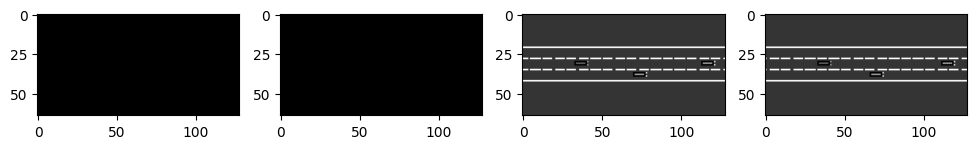

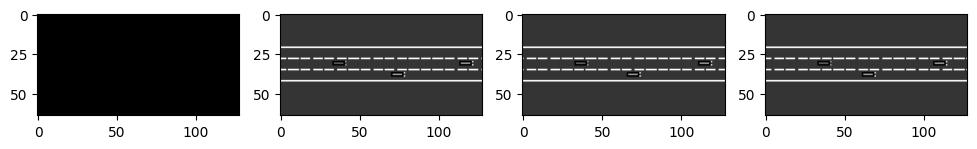

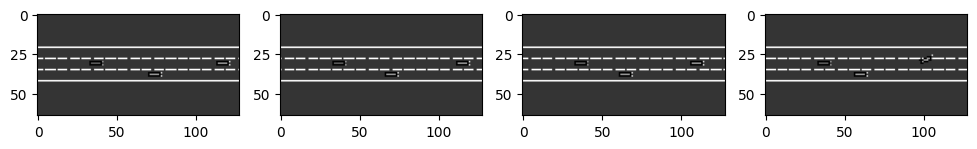

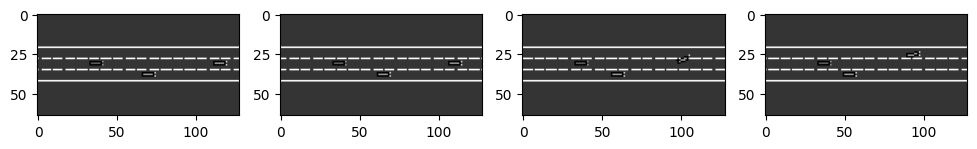

In [ ]:

#DO NOT ADD OR MODIFY THIS CELL
env=gym.make('highway-fast-v0', render_mode='rgb_array')
config = {
      "observation": {
          "type": "GrayscaleObservation",
          "observation_shape": (128, 64),
          "stack_size": 4,
          "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
          "scaling": 1.75,
      },
      "policy_frequency": 2
  }
env.configure(config)
env.reset()
for _ in range(4):
    obs,_,_,_,_ = env.step(env.action_type.actions_indexes["FASTER"])

    _, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

**What does this cell do?**

This cell will show an agent taking __random actions__ in the environment. The green car is the agent.

__By default, the cell is commented out.__

**********************************************
**Optional Instructions for Running the Cell**

1. When running this cell for the first time, execute it to generate a sample video where the agent takes random actions.

2. After running the cell and viewing the video, please comment out (disable) this cell.

3. Restart the runtime by selecting "Runtime" -> "Restart runtime" from the top menu.

4. Once the runtime is restarted, rerun the notebook starting from the beginning.


**Why Is This Important?**

Rendering videos consumes memory, and in the unpaid version of Colab, rendering both the sample and final videos in a single runtime session can lead to a crash due to memory limitations. To prevent this, it's important to comment out this cell after viewing the sample video, restart the runtime, and then rerun the code. This ensures that enough memory is available for rendering the final video.




In [ ]:
"""
import gymnasium as gym
#DO NOT ADD OR MODIFY THIS CELL
def record_videos(env, path="videos"):
    wrapped = record_video.RecordVideo(env, path, force=True, video_callable=lambda episode: True)
    # Capture intermediate frames
    env.unwrapped.set_record_video_wrapper(wrapped)

    return wrapped

def show_videos(path="videos/random_actions"):
    html = []
    for mp4 in Path(path).glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay
                      loop controls style="height: 400px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))
from tqdm.notebook import trange
env = gym.make("highway-fast-v0", render_mode = 'rgb_array')
env.configure({
    "observation": {
        "type": "GrayscaleObservation",
        "observation_shape": (128, 64),
        "stack_size": 4,
        "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
        "scaling": 1.75,
    },
})

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()
from gym.wrappers import RecordVideo

def record_videos(env, path="videos/random_actions"):
    wrapped = RecordVideo(env, path)

    # Capture intermediate frames
    env.unwrapped.set_record_video_wrapper(wrapped)

    return wrapped


env = record_videos(env)
for episode in trange(3, desc="Test episodes"):
    obs, done = env.reset()[0], False
    while not done:
      action = env.action_space.sample()
      # print(action)
      print(env.step(int(action)))
      obs, reward, done, info = env.step(int(action))
      #obs, reward, done, info = env.step(env.action_type.actions_indexes["FASTER"])
env.close()
show_videos()
display.stop()
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nimport gymnasium as gym\n#DO NOT ADD OR MODIFY THIS CELL\ndef record_videos(env, path="videos"):\n    wrapped = record_video.RecordVideo(env, path, force=True, video_callable=lambda episode: True)\n    # Capture intermediate frames\n    env.unwrapped.set_record_video_wrapper(wrapped)\n\n    return wrapped\n\ndef show_videos(path="videos/random_actions"):\n    html = []\n    for mp4 in Path(path).glob("*.mp4"):\n        video_b64 = base64.b64encode(mp4.read_bytes())\n        html.append(\'\'\'<video alt="{}" autoplay\n                      loop controls style="height: 400px;">\n                      <source src="data:video/mp4;base64,{}" type="video/mp4" />\n                 </video>\'\'\'.format(mp4, video_b64.decode(\'ascii\')))\n    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))\nfrom tqdm.notebook import trange\nenv = gym.make("highway-fast-v0", render_mode = \'rgb_array\')\nenv.configure({\n    "observation": {\n        "type": "GrayscaleObservation",\n     

In this cell we define a small nueral network that we will use to aproximate the Q-Function.
<br> __No modification of this cell is needed__

In [ ]:
#DO NOT ADD OR MODIFY THIS CELL
import torch
from torch import nn
class Network(torch.nn.Module):
  def __init__(self):
      super(Network, self).__init__()
      n_input_channels = 4
      self.cnn = nn.Sequential(
          nn.Conv2d(n_input_channels, 32, kernel_size=8, stride=4, padding=0),
          nn.ReLU(),
          nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0),
          nn.ReLU(),
          nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(3072,3072),
          nn.ReLU(),
          nn.Linear(3072,3072),
          nn.ReLU(),
          nn.Linear(3072,5),
      )
  def forward(self,x):
    return self.cnn(x)


Experience replay implementation
<br> __No modification of this cell is needed__

In [ ]:
import collections
import numpy as np

#datastructure for 1 experience
Experience = collections.namedtuple("Experience", field_names=("state","action", "reward", "done", "new_state"))

#store and sample multiple experiences of type Experience
class ExperienceReplay:
  def __init__(self, capacity):
      self.buffer = collections.deque(maxlen=capacity)

  def __len__(self):
      return len(self.buffer)

  def append(self, experience):
      self.buffer.append(experience)

  def sample(self, batch_size):
    with torch.no_grad():
      indices = np.random.choice(len(self.buffer), batch_size,replace=False)
      states=[]
      actions=[]
      rewards=[]
      dones=[]
      next_states=[]
      for idx in indices:
        s,a,r,d,n=self.buffer[idx]
        if len(s) == 2:
          s = s[0]
        states.append(s)
        actions.append(a)
        rewards.append(r)
        dones.append(d)
        next_states.append(n)

      # Make sure the sequences have consistent lengths along the second dimension
      states = torch.Tensor(states)
      actions = torch.Tensor(actions)
      rewards = torch.Tensor(rewards).type(torch.float64)
      dones = torch.Tensor(dones).type(torch.float64)
      next_states = torch.Tensor(next_states)

      # Now, you can return these tensors
      return states, actions, rewards, dones, next_states



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<br> __Modify only the sections indicated__

<br> A class called Agent is defined below that implements a Q-Learning agent:
<br>This class implements the following functions:
<br>fill_buffer(): Fills the buffer with a selected amount of state action pairs, the last episode during generation of state action pairs is saved
<br>rand_fill_buffer(): Fills the buffer by takeing random actions in the environment
<br>mean_reward(): calculates the mean reward achieved by the agent for a defined amount of episodes
<br>show_video(): function used to display video in notebook
<br>video(): record actions from agent and create videos
<br>load_save(): can be used to load a saved checkpoint to resume training, can be used to train a agent past the colab time limit.
You will need to implement the epsilon greed policy as well as the Q learning loss function.


# Only edit the code in the comment blocks "TODO:" is indicated. This appears in the fill_buffer() function where you will implement the epsilon greedy function and the train function where you will implement the loss function for Q-Learning.

In [ ]:
from torch._C import device
from pyvirtualdisplay import Display
from gym.wrappers import RecordVideo

class Agent:
  def __init__(self, env, Network):
    self.env=env
    self.net=Network()
    self.target_net=Network()
    self.target_net_update_freq=50 #update target net every 50 iters
    self.buffer=ExperienceReplay(15000) #Size of Experience buffer is set to 15000 state action pairs
    self.fill_buffer_size=1000 #initial fill buffer, during training this is automatically set to 1 episode worth of state action pairs
    self.initial_buffer_exp=1000 #this controls how many random actions to take in the env to initially fill the buffer, the exact amount will vary as the last episode is rolled out to completion
    self.epsilon=1.0 #epsilon is initially set to 1.0 the slowly decayed
    self.eps_decay=.9999 #we decay epsilon by using the following formula epsilon=epsilon*eps_decay , this is automatically done no need to implement
    self.eps_min=0.02 #minimum epsilon value
    self.batch_size=10 #batch size, number of experiences we feed the Q-Learning Network during trainnig

    #implementation  variables to store loss, reward, and set device
    self.device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    self.net.to(self.device)
    self.target_net.to(self.device)
    self.loss_list=[]
    self.loss_list_idx=[]
    self.reward_list=[]
    self.reward_list_idx=[]

    self.rand_fill_buffer()
    self.gamma=torch.tensor(0.99,dtype=torch.float64)
    isExist = os.path.exists("checkpoint")
    if not isExist:
      os.makedirs("checkpoint")
  #fills the replay buffer with state action pairs defined by self.fill_buffer_size
  #Epsilon greedy policy must be defined here
  def fill_buffer(self):
    steps=0
    not_full = True
    with torch.no_grad():
        while not_full:
          if steps>self.fill_buffer_size:
            not_full=False
          episode_done=False
          state=self.env.reset()[0]

          while not episode_done:
            #############################################################################
            # TODO: Select action based on epsilon greed policy.                        #
            # Set the action variable from None to the correct action.                  #
            # The following variables can be used:                                      #
            # np.random.random() This is a random number from 0 to 1                    #
            # self.epsilon This is the epsilon value                                    #
            # random_action A random action that can be taken in the environment        #
            # agent_action The action the Q learning agent would take                   #
            #############################################################################


            action = None
            random_action = self.env.action_space.sample()
            net_out = self.net(torch.unsqueeze(torch.tensor(state, dtype=torch.float32).to(self.device), 0))
            agent_action = int(torch.max(net_out, dim=1)[1].detach())
            action =  agent_action if  np.random.random() > self.epsilon else random_action


            #############################################################################
            self.epsilon = max(self.epsilon*self.eps_decay, self.eps_min)
            new_state, reward, is_done, truncated = self.env.step(action)[0:-1]
            len(new_state)
            exp = Experience(state,action,reward,is_done,new_state)
            self.buffer.append(exp)
            steps+=1
            #pbar2.update(1)
            episode_done=is_done or truncated
            state=new_state

#fill buffer with random actions defined by self.initial_buffer_exp
  def rand_fill_buffer(self):
    steps=0
    not_full = True
    print("filling buffer with random actions")
    with tqdm(total=self.initial_buffer_exp) as pbar:
      while not_full:
          if steps>self.initial_buffer_exp:
            not_full=False
          # get experience from 1 episode
          episode_done=False
          state=self.env.reset()[0]

          while not episode_done:
            #random action
            action = self.env.action_space.sample()
            new_state, reward, is_done, truncated, _ = self.env.step(action)
            #exp = Experience(state,action,reward,is_done,new_state)
            exp=[state,action,reward,is_done,new_state]
            self.buffer.append(exp)
            steps+=1
            pbar.update(1)
            #print(steps)
            episode_done=is_done or truncated
            state=new_state

#calculate mean reward for 20 episodes
  def mean_reward(self):
    #average reward selected number of episodes
    rewards=0
    episodes=20
    ep_len=1
    for ep in range(episodes):
        episode_done=False
        state=torch.tensor(self.env.reset()[0]).type(torch.float32)
        while not episode_done:
          out=torch.unsqueeze(torch.tensor(state),0)
          action=self.net(out.to(self.device))
          action=int(torch.max(action,dim=1)[1])
          new_state, reward, is_done, truncated = self.env.step(action)[0:-1]
          ep_len+=1
          episode_done=is_done or truncated
          rewards+=reward
          state=torch.Tensor(new_state).type(torch.float32)

    print("average episode time steps: "+str(ep_len/episodes))
    return rewards/episodes

#used to load video in notebook
  def show_videos(self,path="videos/agent_actions"):
    html = []
    for mp4 in Path(path).glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay
                      loop controls style="height: 400px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

#record and display video of agent taking actions in environment
  def video(self):
    display = Display(visible=0, size=(400, 300))
    display.start()
    def record_videos(env, path="videos/agent_actions"):
        wrapped = RecordVideo(env, path)

        # Capture intermediate frames
        env.unwrapped.set_record_video_wrapper(wrapped)

        return wrapped
    env = gym.make("highway-fast-v0", render_mode='rgb_array')
    env.configure({
        "observation": {
            "type": "GrayscaleObservation",
            "observation_shape": (128, 64),
            "stack_size": 4,
            "weights": [0.2989, 0.5870, 0.1140],
            "scaling": 1.75,
        },
    })
    env = record_videos(env)
    for episode in range(3):
        state, done = env.reset()[0], False
        state=torch.tensor(state).type(torch.float32)
        while not done:
          out=torch.unsqueeze(torch.tensor(state),0)
          action=self.net(out.to(self.device))
          action=int(torch.max(action,dim=1)[1])
          state, reward, done, info = env.step(int(action))
          state=torch.Tensor(state).type(torch.float32)

    env.close()
    self.show_videos()

#load saved checkpoint to extend training past 3000
  def load_save(self,save_path):
    self.net.load_state_dict(torch.load(save_path))
    self.target_net.load_state_dict(torch.load(save_path))

#Used to train the Q-Learning Agent
#The loss function must be defined here
  def train(self,total_iterations):
    optimizer = torch.optim.Adam(self.net.parameters(),lr=5e-4)
    self.fill_buffer_size=1
    # loss = nn.MSELoss()
    for idx in range(total_iterations):

      #fill buffer with exp using model and epsilon greedy policy
      self.fill_buffer()

      #We take a random batch from the replay buffer
      batch=self.buffer.sample(self.batch_size)
      #unpack batch


      #use these variable to calculate loss for Q function
      state,action,reward,is_done,next_state=batch

      #############################################################################
      # TODO: Calculate Q value, target Q value, and Loss for Q Learning          #
      # refer to lecture 17 and the following links:                     #
      # https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html  #
      # https://arxiv.org/pdf/1312.5602v1.pdf                                     #
      # Note: Use Mean Squared Error for Loss, DO NOT use Huber Loss              #
      # use the following variables:                                              #
      # self.net() :This is the current netowkr used to aproximate the Q function #
      # self.target_net() :This is the target network used in the Q learning loss #
      # state :This is the current state                                          #
      # action :This is the action taken in the current state                     #
      # reward :This is the reward for taking the action in the current state     #
      #         and going to the next_state                                       #
      # is_done :Boolean value of 0 if not done and 1 if done                     #
      # next_state :next state for taking action in current state                 #
      # Note: all of these variables have a batch dimension first                 #
      #############################################################################
      # IMPORTANT:                                                                #
      # Please refer to Algorithm 1 in the DQN paper to understand                #
      # how to calculate the Loss for a terminal state, when done is set to True/1#
      #############################################################################
      #compute Q value
      #give state to net and select action
      state = state.to(self.device)
      action = action.to(self.device)
      reward = reward.to(self.device)
      is_done = is_done.to(self.device)
      next_state = next_state.to(self.device)

      with torch.no_grad():
        clist = self.net(state)
        nlist = self.target_net(next_state)

      self.net.train()
      y_true = []

      for i, (_, a, r, d, _) in enumerate(zip(state, action, reward, is_done, next_state)):
          new_q = r + self.gamma*(torch.max(nlist[i])) if not d else r

          c_q = clist[i]
          c_q[int(a.item())] = new_q
          c_q = c_q.detach().cpu().numpy().tolist()
          y_true.append(c_q)

      y_true = torch.tensor(y_true, dtype=torch.float).to(self.device)
      y_pred = self.net(state)
      loss_fn = nn.MSELoss()

      # ... [inside your training loop]
      y_true = torch.tensor(y_true, dtype=torch.float).to(self.device)
      y_pred = self.net(state)

      # Calculate Loss
      loss = loss_fn(y_pred, y_true)




      #calculate expected value using target network
      #value if state is done is just the reward




      #############################################################################

      self.loss_list.append(loss.detach().clone().cpu() )
      self.loss_list_idx.append(idx+1)
      optimizer.zero_grad()
      loss.backward()

      torch.nn.utils.clip_grad_norm_(self.net.parameters(), 10)
      optimizer.step()

      if (idx+1)%self.target_net_update_freq==0:
        print("iteration count = "+str(idx+1))
        print("update target net")
        mean_rewards=self.mean_reward()
        self.reward_list.append(mean_rewards)
        self.reward_list_idx.append(idx+1)
        print("mean reward "+str(mean_rewards))
        #update target net here
        self.target_net.load_state_dict(self.net.state_dict())
        #save model every 500 iterations
        if (idx+1)%500==0:
          torch.save(self.net.state_dict(), "checkpoint/reward_"+str(int(mean_rewards)) +"_iteration_"+ str(idx+1) + "_model.pt" )

    return


Run the following cells to train your Q-Learning agent for 3000 iterations. A video will be saved in the videos/agent_actions folder.

In [ ]:
#We create an instance of the environment here
env = gym.make("highway-fast-v0", render_mode='rgb_array')
env.configure({
    "observation": {
        "type": "GrayscaleObservation",
        "observation_shape": (128, 64),
        "stack_size": 4,
        "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
        "scaling": 1.75,
    },
})

# We will create an object from the Agent class called Q_agent
# We use this object's train function to train our Agent and display a video of the trained Agent
Q_agent=Agent(env,Network)


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(


filling buffer with random actions


1014it [00:46, 21.87it/s]


In [ ]:
Q_agent.train(300)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-9a5a46eec7c0>:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  states = torch.Tensor(states)
<ipython-input-9-54694e33be65>:242: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true, dtype=torch.float).to(self.device)


iteration count = 50
update target net


<ipython-input-9-54694e33be65>:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out=torch.unsqueeze(torch.tensor(state),0)


average episode time steps: 12.6
mean reward 9.660000000000018
iteration count = 100
update target net
average episode time steps: 12.95
mean reward 9.981666666666687
iteration count = 150
update target net
average episode time steps: 7.2
mean reward 6.030818133389387
iteration count = 200
update target net
average episode time steps: 12.6
mean reward 9.302626693695252
iteration count = 250
update target net
average episode time steps: 6.7
mean reward 5.521167760001718
iteration count = 300
update target net
average episode time steps: 7.6
mean reward 6.402285154307881


In [ ]:
Q_agent.video()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr

The following cell will display the reward your agent achieved during training vs the iterations it has completed


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


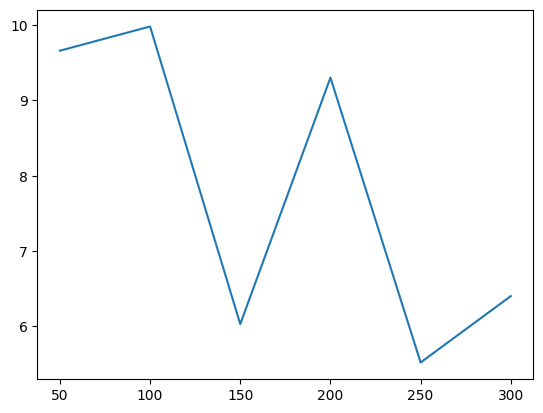

In [ ]:
plt.plot(Q_agent.reward_list_idx,Q_agent.reward_list)
plt.show()

The following cell will display the loss calculated for your agent during training vs the iterations it has completed

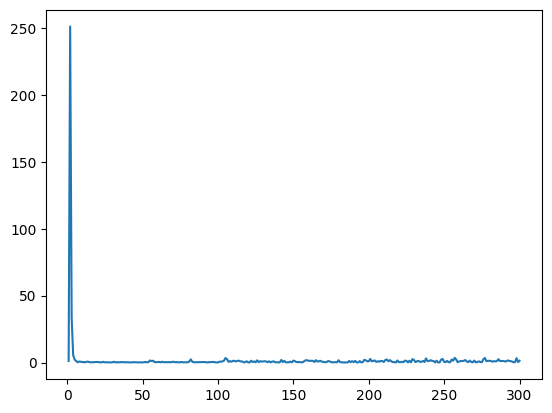

In [ ]:
plt.plot(Q_agent.loss_list_idx,Q_agent.loss_list)
plt.show()